<a href="https://colab.research.google.com/github/annamarkova13/Increasing_user_engagement_for_app/blob/main/Increasing_user_engagement_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 Research Description**

### 📱 **Product for Research**  
The *Unnecessary Things* app, where users sell their unnecessary items by listing them on a classifieds board.
  
### 📎 **Research Client**  
**Product Manager** for app development  
  
### 💎 **Research Goal**  
To **increase user engagement** in the *Unnecessary Things* app.  
  
### ⚙️ **Research Objectives**  
1. Analyze the **relationship** between the target event (*contact views*) and other user actions.  
2. Examine **scenarios** that lead to the target action.  
   - **Target action**: Viewing the seller's contact information.  
3. Determine what **drives conversion** to the target action.  
   - Build **funnels** for the main scenarios segmented by unique users.  
4. Calculate the **relative frequency** (proportion) of events for two user groups:  
   - Users who viewed contacts  
   - Users who did not view contacts  
  
### 🗂️ **Data**  
The dataset contains information on **events** performed in the *"Unnecessary Things"* mobile app, where users sell their unnecessary items by listing them on a classifieds board.  
The **dataframes** used in the research are:  
- `mobile_sources.csv`  
- `mobile_dataset.csv`  
  
### 📅 **Timeframe Considered in the Data**  
The dataset includes data on users who **first performed actions** in the app **after October 7, 2019**.  
The time horizon extends **up to November 3, 2019**.  

---

## **2 Decomposition and Research Plan**

### **1. Data Preprocessing**  
- Import the working files  
- Merge tables into a single working file  
- Rename columns appropriately  
- Check dataset size, missing values, and data types  
- Transform data types as needed  
- Identify duplicates in the data and merge implicit duplicates  
- Find and handle missing values  
- Summarize findings from the data preprocessing stage  
  
### **2. Exploratory Data Analysis**  
- Examine the number and frequency of events (`event.name`)  
- Analyze the distribution of sources (`source`) where the app was installed from  
- Determine how many users are included in the research  

### **3. Key Research Questions**  

1) Analyze the relationship between the target event (*contact views*) and other user actions:  
1.1 Identify scenarios/patterns within sessions that lead to contact views:  
  - **Session identification**:  
    - Sort the dataframe chronologically  
    - Define a timeout threshold by analyzing the distribution of time between consecutive events (based on percentiles)  
    - Justify the threshold and create a summary table to identify unique session IDs  
  - Remove duplicate events within sessions (`drop_duplicates` using `session_id` and `event_name`)  
  - Map user flows from one event to another (user journey through the app) using a **Sankey diagram**  
  - Use `session_id` as the key parameter in calculations  
  - Analyze the Sankey diagram results and identify four main user scenarios leading to contact views  

1.2 Build funnels for the main scenarios segmented by unique users:  
  - Identify sessions by type and filter the dataframe for steps in each session  
  - Compare conversion rates to the target event across scenarios  

- Analyze session durations for sessions with contact views versus sessions without contact views  

2) Calculate the relative frequency (proportion) of events for two user groups:  
- Group 1: Users who viewed contacts  
- Group 2: Users who did not view contacts  

### **4. Hypothesis Testing**  
- **Hypothesis 1**:  
  Some users perform the actions `tips_show` and `tips_click`, while others perform only `tips_show`.  
  - Test:  
    - **H₀**: Conversion to contact views differs between these two groups  
    - **Hₐ**: There is no difference in conversion to contact views between the groups  
- **Hypothesis 2**:  
  Users typically behave as follows:  
  - First, they browse ads within a category  
  - Then, they add some ads to favorites  
  - Finally, they start contacting sellers.  
  - Test:  
    - **H₀**: Conversion to contact views differs between users who add to favorites and those who do not  
    - **Hₐ**: There is no difference in conversion to contact views between these groups  

### **5. Conclusions and Recommendations**  
- Formulate conclusions  
- Provide actionable recommendations  
- Prepare a presentation summarizing the research findings  

## **3 General Conclusions Based on Research Results and Recommendations**

### General Conclusions Based on Research Results and Recommendations

Based on the research, answers were obtained to the **key questions and tasks of the client** and **hypotheses were tested**:

**Key Questions**

- To conduct the analysis, we identified user sessions, setting the maximum time difference between adjacent events for a single user as 7.5 minutes (which corresponds to the upper whisker limit of Q3 + 1.5*IQR).
- As a result, we obtained 13,824 sessions.
- Of these, 1,323 sessions (or 9.6%) ended with a target event `contacts_show` or `contacts_call`.
- In total, within the identified sessions that ended with the target event, we were able to identify 191 scenarios.

**1. Analysis of the Relationship Between the Target Event (Contact View) and Other User Actions**

By examining the chains of actions leading to the target event, we obtained the following results:
- Most scenarios consist of chains with no more than 4 events.
- The majority of scenarios consist of a single event — viewing contacts (35% of scenarios). This suggests that the case occurs when an ad is opened via a link, and the first action is viewing the contacts to contact the seller.
- Following that, there are composite scenarios consisting of 2 or more actions: 22% of sessions have the sequence `tips_show, contacts_show` — viewing a recommended ad and viewing contacts.
- In 12% of sessions, the sequence includes viewing contacts and making a call via the app (`contacts_show, contacts_call`).
- In 6% of sessions, there is the sequence `photos_show, contacts_show` — viewing photos and then viewing contacts.
- In 5% of sessions, the sequence is `search, contacts_show` — searching and viewing contacts.
- In 4% of sessions, there is the sequence `search, contacts_show, contacts_call` — searching, viewing contacts, and making a call via the app.

**User Action Chains Visualization** was created using a Sankey diagram, where the flow of user action sequences is clearly visible.

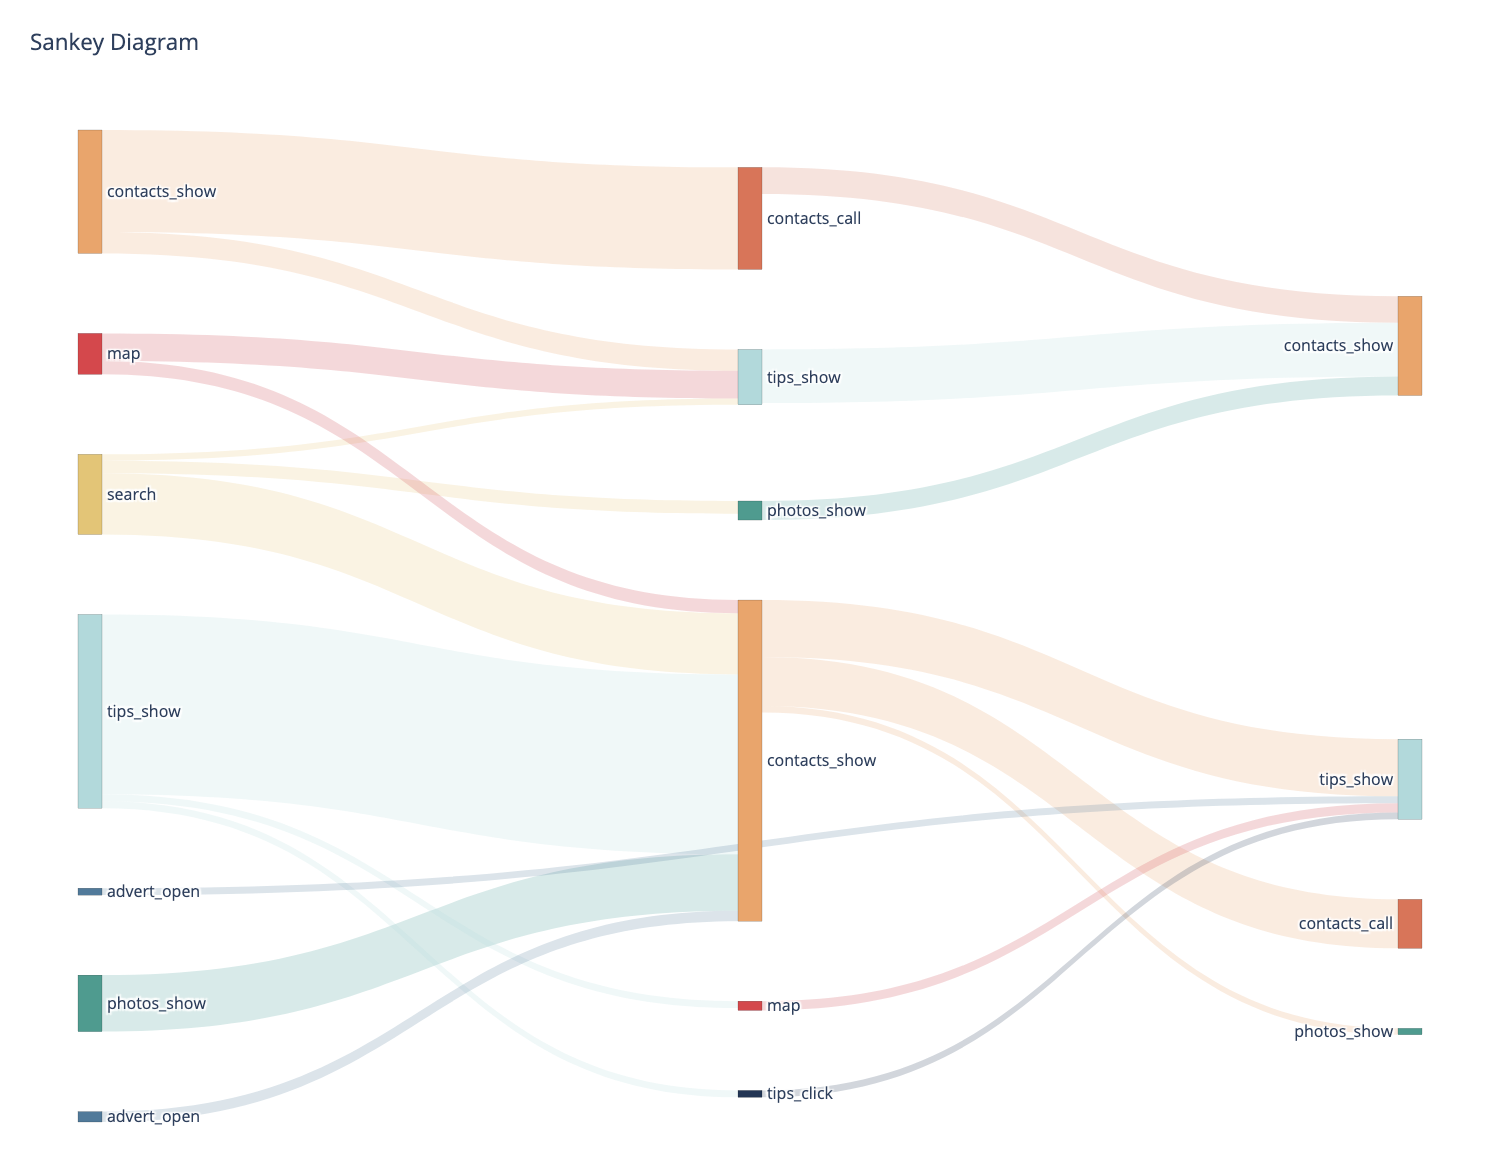

In the next step, we analyzed the identified user behavior scenarios leading to the target action and **built conversion funnels for the selected scenarios by unique users**. In total, we considered four scenarios:
```
Scenario 1 - `tips_show -> contacts_show` conversion at step 18%
Scenario 2 - `contacts_show -> contacts_call` conversion at step 22%
Scenario 3 - `photos_show -> contacts_show` conversion at step 31%
Scenario 4 - `search -> contacts_show` conversion at step 23%
```
- Among users who view recommended ads, 18% have viewed the seller's contacts at least once.
- Among users who viewed contacts, 22% called via the app.  
- The best conversion results to the target action were seen among those who viewed photos; nearly a third of users who viewed photos also viewed the seller's contacts.  
- Of those who used search, 23% viewed contacts at least once.  
   
Also, in the context of the first research question, we **calculated the session duration with and without viewing contacts** and determined that **the difference between the means is statistically significant** at `alpha=0.05`:
- The average session duration with contact viewing = 8.5 minutes (median = 5.2 minutes).
- The average session duration without contact viewing = 6.6 minutes (median = 4.5 minutes).
- The difference in means is 2 minutes.  

**2. Calculation of Relative Frequency (Proportion) of Events by Two Groups of Users:**  
```
Group 1: Users who viewed contacts
Group 2: Users who did NOT view contacts
```
- The calculation results show that in Group 1, where users viewed contacts, they less frequently saw recommended ads (11% fewer), did slightly fewer searches (2% less), opened ads' cards less frequently (4% less), opened the map less frequently (2% less), and watched photos slightly more (1% more).
- They added ads to favorites and clicked on recommended ads with the same frequency (2% and 1%, respectively).
- Across all events, both groups of users most frequently saw recommendations (47% and 58%), then viewed photos (14% and 13%).
- As expected, there were no call events from the app in the second group.

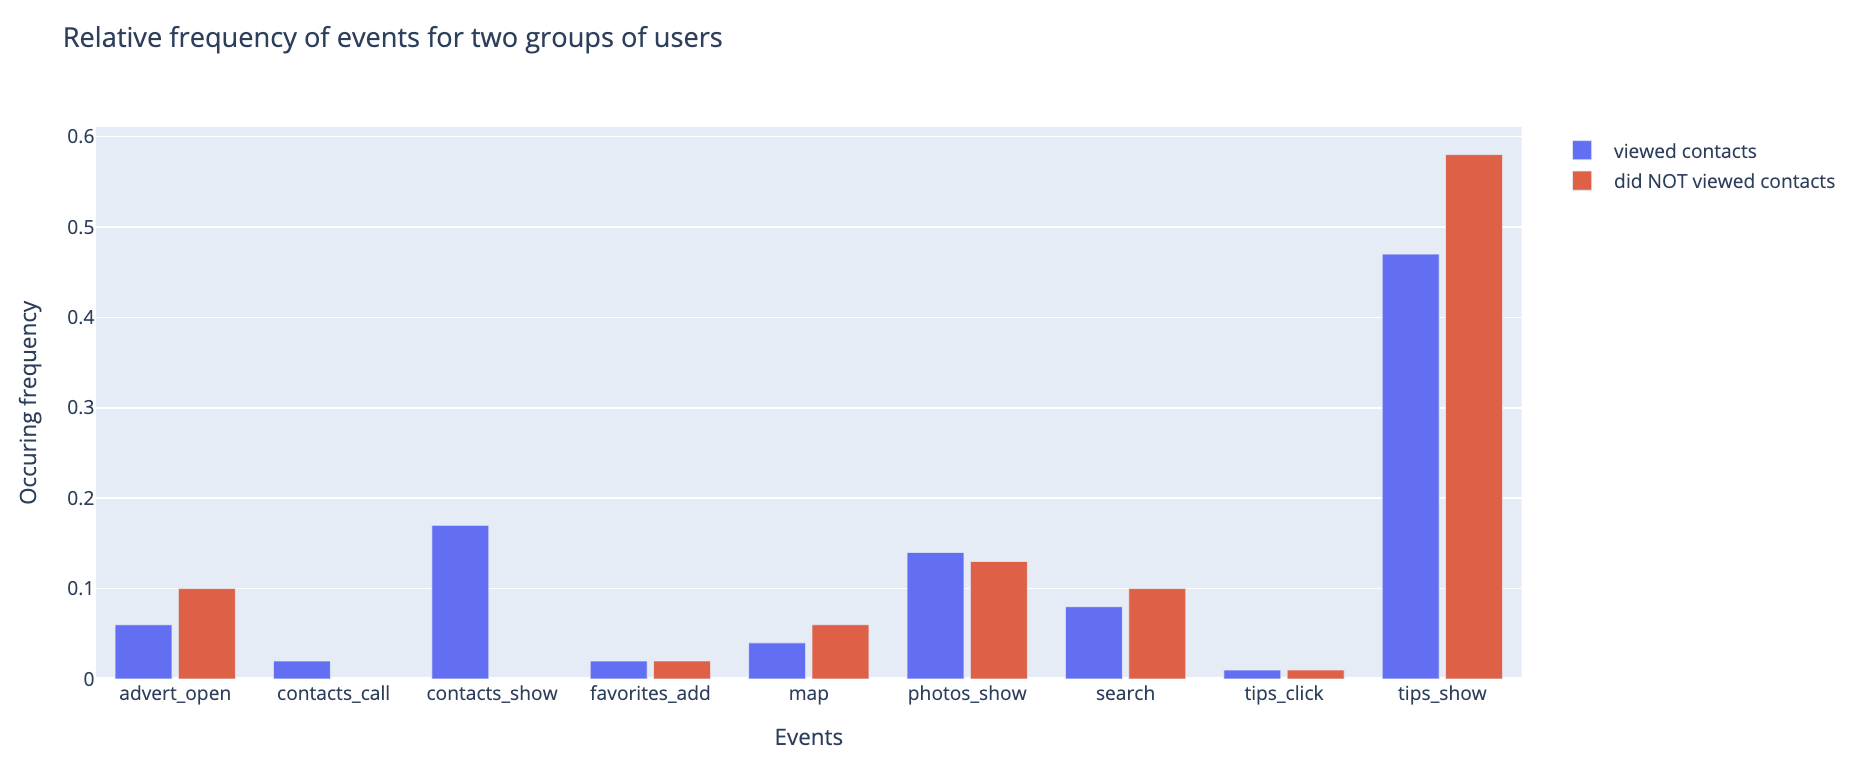

**3. Results of Hypothesis Testing:**  
- The conversion to contact view for two groups of users (one group performs the actions tips_show and tips_click, while the other performs only tips_show) is different. The conversion rate for the first group is 31%, and for the second group, it is 17%.  
  The statistical test showed that the differences in conversion values are statistically significant. This means that users who open recommended ads are more likely to view seller contacts.
- The conversion to contact view for two groups of users (one group added products to favorites, the other did not) is also different — 39% versus 11%, respectively. The statistical test showed that the difference is statistically significant. This means we can conclude that users who add products to their favorites are more likely to reach the contact view stage.

**4. Recommendations:**
- Attention should be paid to the low number of clicks on recommended ads. It’s possible that irrelevant ads are being displayed, and it would be helpful to include attractive product alternatives, substitute products, or complementary products in the results.
- For more detailed analysis, additional event tracking should be implemented, such as the source from which the app was opened (from the main screen, via a link), and tracking of user movements between screens.
- Based on the results of the study, we determined that the conversion to a seller call is higher among users who have added the ad to their favorites. To increase the attractiveness of ads, it would be beneficial to create and publish recommendations for sellers on how to create more appealing ads.

## **4 Research**

### 1 Data prepararion

📌 **Data Preparation Summary**
- **Dataset Size**: 74,197 observations, 4 columns  
- **Missing Values**: No missing values in any variables  
- **Data Type Change**: The `event_time` variable was changed from `object` to `datetime`  
- **Explicit Duplicates**: No explicit duplicate rows in the data  
- **Implicit Duplicates**: Semantic duplication was found in the `event_name` variable; the event names `show_contacts` and `contacts_show` were merged  
- **Value Replacement**: In the `event_name` variable, values `[search_1, ...]` were replaced with `search`

#### 1.1 Impoting required libraries

In [1]:
# impoting required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import requests
from tqdm import tqdm
import plotly.graph_objects as go
import statistics
from scipy import stats as st
import math as mth
import plotly.express as px
from scipy import stats as st

import plotly.express as px

In [2]:
!pip install matplotlib --upgrade -q
# !pip install plotly==5.5.0 -q

#### 1.2 Impoting data files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# impoting data files
mobile_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab projects/mobile_dataset.csv')
mobile_sources = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Colab projects/mobile_sources.csv')

In [5]:
mobile_dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [6]:
mobile_sources.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [7]:
# rename data columns
mobile_dataset.columns = ['event_time','event_name', 'user_id']
mobile_sources.columns = ['user_id','source']
print(mobile_dataset.columns)
print(mobile_sources.columns)

Index(['event_time', 'event_name', 'user_id'], dtype='object')
Index(['user_id', 'source'], dtype='object')


In [8]:
# merge two tables into one
mobile_df = pd.merge(mobile_dataset, mobile_sources, on='user_id')
mobile_df.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


In [9]:
# Check the dataset size, gaps, data types
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event_time  74197 non-null  object
 1   event_name  74197 non-null  object
 2   user_id     74197 non-null  object
 3   source      74197 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


**Dataset Information**

- **Dataset Size**: 74,197 observations, 4 columns  
- **Missing Values**: No missing values in any variables  
- **Variable Types**: All variables are in text format  

**Data Type Changes**  
- `event_time`: object → datetime

#### 1.3 Data type conversion

In [10]:
mobile_df['event_time'] = pd.to_datetime(mobile_df['event_time'], format='%Y-%m-%d %H:%M:%S.%f')
# The format is changed to '%Y-%m-%d %H:%M:%S.%f' to accommodate the space separator and fractional seconds.
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.3+ MB


#### 1.4 Duplicate Search in Data and Merging Duplicates

- There are **no explicit duplicate rows** in the data.  
- In the `event_name` variable, the actions `contacts_show` and `show_contacts` were found to be duplicates. The name `show_contacts` was replaced with `contacts_show`.  


In [11]:
mobile_df.duplicated().sum()
# no duplicated rows

0

In [12]:
mobile_df['event_name'].value_counts()

,count
event_name,
tips_show,40055
photos_show,10012
advert_open,6164
contacts_show,4450
map,3881
search_1,3506
favorites_add,1417
search_5,1049
tips_click,814


In [13]:
mobile_df['event_name'] = mobile_df['event_name'].replace('show_contacts', 'contacts_show')

In [14]:
mobile_df['event_name'].value_counts() # check that replacement was succesful

,count
event_name,
tips_show,40055
photos_show,10012
advert_open,6164
contacts_show,4529
map,3881
search_1,3506
favorites_add,1417
search_5,1049
tips_click,814


In [15]:
mobile_df['source'].value_counts()

,count
source,
yandex,34286
google,20445
other,19466



#### 1.5 Value Replacement
Since we do not know the semantic meaning of the events `search_1` ... `search_7` in the `event_name` variable at this stage, I suggest replacing these values with just `search`.

In [16]:
mobile_df['event_name']=mobile_df['event_name'].str.replace('search_\d+', 'search', regex=True)

In [17]:
mobile_df['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

### 2 Exploratory Data Analysis
Let’s examine the number and frequency of events in the `event_name` variable:

- The most frequent event is `tips_show` (showing recommendations), which accounts for **54%** of all events.  
- A significantly smaller number of events are related to viewing photos (`photos_show`, **13%**), opening an ad card (`advert_open`, **8%**), and showing contacts (`contacts_show`, **6%**).  
- The remaining events occurred **5%** of the time or less.  
- At first glance, we observe that viewing a recommended ad only occurred in **1%** of all events.  
- The ratio of recommended ad views to clicks is **2%**.  

In [18]:
event_name_counting = mobile_df.groupby('event_name').agg({'event_name':'count'})
event_name_counting.columns = ['event_name_count']
event_name_counting['share'] = round(event_name_counting['event_name_count']/sum(event_name_counting['event_name_count']),2)
event_name_counting = event_name_counting.sort_values(by='share',ascending=False).reset_index()
event_name_counting

,event_name,event_name_count,share
0,tips_show,40055,0.54
1,photos_show,10012,0.13
2,search,6784,0.09
3,advert_open,6164,0.08
4,contacts_show,4529,0.06
5,map,3881,0.05
6,favorites_add,1417,0.02
7,contacts_call,541,0.01
8,tips_click,814,0.01


In [20]:
fig = px.bar(event_name_counting, x='event_name', y='share',
             text_auto=True, title="Event occurrence frequency by type",
             height=400)
fig.update_layout(
    xaxis_title="Event type",
    yaxis_title="Frequency of occurrence")
fig.show()

In [22]:
print("The ratio of the number of impressions of recommended ads to clicks on them = " + str(
    round(event_name_counting.loc[event_name_counting.event_name=="tips_click", 'event_name_count'].values[0]/\
event_name_counting.loc[event_name_counting.event_name=="tips_show", 'event_name_count'].values[0],2)))

The ratio of the number of impressions of recommended ads to clicks on them = 0.02


- Let’s examine the distribution of the `source` from which the app was installed:  
  - 45% of users installed the app from the `yandex` source.  
  - 29% installed it from the `google` source.  
  - 26% installed it from the `other` source.  
  - Thus, the majority of users come from Yandex.  

In [23]:
event_name_counting = mobile_df.drop_duplicates('user_id', keep='first').groupby('source').agg({'user_id':'count'})
event_name_counting.columns = ['source_count']
event_name_counting['source_share'] = round(event_name_counting['source_count']/sum(event_name_counting['source_count']),2)
event_name_counting = event_name_counting.sort_values(by='source_share',ascending=False).reset_index()
event_name_counting

,source,source_count,source_share
0,yandex,1934,0.45
1,other,1230,0.29
2,google,1129,0.26


- Let’s determine the number of unique users included in the study.  
The study includes **4,293 unique users**.

In [25]:
mobile_df['user_id'].unique().size

4293

#### **Conclusions from the Exploratory Data Analysis Section**  

- The study includes **4,293 unique users**.  
- After analyzing the number and frequency of events in the `event_name` variable, we observed the following:  
  - The most frequent event is `tips_show` (showing recommendations), accounting for **54%** of all events.  
  - Significantly fewer events involve viewing photos (`photos_show`, **13%**), opening an ad card (`advert_open`, **8%**), and showing contacts (`contacts_show`, **6%**).  
  - The remaining events occurred **5%** of the time or less.  
  - At first glance, we see that viewing a recommended ad only occurred in **1%** of all events.  
  - The ratio of recommended ad views to clicks is **2%**.  
- After examining the distribution of `source` from which the app was installed, we found that:  
  - **Yandex** is the most popular traffic source, with **45%** of users installing the app from this source.  
  - Fewer users installed the app from Google (**29%**) and other sources (**26%**).  

### 3 Key Research Questions  

#### **1. Analyze the relationship between the target event (viewing contacts) and other user actions.**  

##### **1.1 Identify scenarios/patterns within sessions that lead to viewing contacts**.
To achieve this we will **Define Sessions**:  
  - Sort the DataFrame in chronological order.  
  - Determine the timeout value: The timeout was set to **7.5 minutes** (`Q3 + 1.5 * IQR`).  

In [28]:
# Setting order by datetime
mobile_df = mobile_df.sort_values(by=['user_id', 'event_time'])

# Determine the Time Difference Between Events for Unique Users
time_diff = mobile_df.groupby('user_id')['event_time'].diff()
# Convert to minutes using .dt accessor and total_seconds()
time_diff = time_diff.dt.total_seconds().div(60).dropna()

# Boxplot of time difference for unique users
fig = px.box(x=time_diff,
             #notched=True, # used notched shape
             title="Boxplot of time difference between user actions",
            )
fig.update_layout(plot_bgcolor='white',
                  font_size=12,
                  height=400)
fig.update_layout(
    xaxis_title="Time difference (min)",
    yaxis_title="time_diff",
    xaxis_range=[0,40])
fig.show()

In [35]:
for q in [50, 75, 90, 95]:
    print("timedelta for " + str(q) + " percentile the difference between the times of events is " + str(round(np.percentile(time_diff, q),2)) + " min")
print ("--------")

q3, q1 = np.percentile(time_diff, [75 ,25])
iqr = q3 - q1
print("timedelta for max (Q3+1.5*IQR) is " + str(round(q3+1.5*iqr,2)) + " min")

timedelta for 50 percentile the difference between the times of events is 1.18 min
timedelta for 75 percentile the difference between the times of events is 3.01 min
timedelta for 90 percentile the difference between the times of events is 17.01 min
timedelta for 95 percentile the difference between the times of events is 624.61 min
--------
timedelta for max (Q3+1.5*IQR) is 6.92 min


On the box plot, we visualized the distribution of `timedelta` values representing the time difference between actions of unique users. Detailed statistical calculations revealed the following:  
- The median `timedelta` between actions is **1 minute**.  
- `Q3` = **3 minutes**.  
- `Q3 + 1.5 * IQR` = **7.5 minutes**.  
- The 95th percentile of `timedelta` = **624 minutes**.  

I propose using **7.5 minutes** as the threshold for separating sessions in this study, as it corresponds to the upper whisker (`Q3 + 1.5 * IQR`).  
The 95th percentile value of `timedelta` is **624 minutes**, or **10.5 hours**, which seems too large to reasonably define session boundaries.  

After defining sessions we got 13 824 sessions

In [36]:
timeout = q3+1.5*iqr # 7.5 min
g = (mobile_df.groupby('user_id')['event_time'].diff() > pd.Timedelta(str(timeout)+'Min')).cumsum()
mobile_df['session_id'] = mobile_df.groupby(['user_id', g], sort=False).ngroup() + 1
mobile_df.head()

,event_time,event_name,user_id,source,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1


We will create a new DataFrame, `mobile_df_wtht_dupl`, where we remove consecutive duplicate `event_name` entries while keeping the first occurrence of the event if duplicates are present.

In [38]:
mobile_df_wtht_dupl = []  # Initialize as a list

for i in mobile_df['session_id'].unique():
    session_df = mobile_df.query('session_id == @i')

    previous_value = None
    new_lst = []
    ind_lst = []

    for i,elem in enumerate(session_df['event_name']):
        if elem != previous_value:
            new_lst.append(elem)
            ind_lst.append(i)
            previous_value = elem

    data = session_df[session_df.reset_index().index.isin(ind_lst)]
    mobile_df_wtht_dupl.append(data)  # Append to the list

mobile_df_wtht_dupl = pd.concat(mobile_df_wtht_dupl) # Concatenate all dataframes in the list

In [39]:
mobile_df_wtht_dupl.head(5)

,event_time,event_name,user_id,source,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2
6565,2019-10-09 18:40:28.738785,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2
36412,2019-10-21 19:52:30.778932,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,3
36419,2019-10-21 19:53:38.767230,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,3


Let’s examine the action sequences within sessions.

In [40]:
# We will create a table using the `groupby` method, combining event sequences into lists for each session.
sessions_events_chains = mobile_df_wtht_dupl.groupby('session_id')['event_name'].apply(list)\
                                            .reset_index(name='events_chain')
sessions_events_chains.head()

,session_id,events_chain
0,1,[tips_show]
1,2,"[map, tips_show]"
2,3,"[tips_show, map, tips_show, map, tips_show]"
3,4,"[map, tips_show, map, tips_show]"
4,5,"[search, photos_show]"


We will select sessions where the last event was the viewing of contacts (`contacts_show`).

In [41]:
sessions_contacts_show = sessions_events_chains[sessions_events_chains['session_id']\
                               .isin(mobile_df.query('event_name=="contacts_show"')['session_id']\
                               .drop_duplicates().values)]

The `position_check` function returns the original action sequence if the last event in the sequence is `contacts_show` or `contacts_call`; otherwise, it returns an empty list.

In [42]:
def position_check(input_list):
    if input_list[-1] in(['contacts_show','contacts_call']):
        res = input_list
    else:
        res = np.nan
    return res

sessions_contacts_show = sessions_contacts_show.loc[sessions_contacts_show['events_chain']\
                                                    .apply(position_check).dropna().index]

sessions_contacts_show.head()

,session_id,events_chain
7,8,"[photos_show, favorites_add, search, contacts_..."
8,9,"[contacts_show, contacts_call]"
15,16,[contacts_show]
16,17,[contacts_show]
30,31,"[contacts_show, contacts_call]"


In [43]:
print(len(sessions_contacts_show)/len(sessions_events_chains)*100)
print(len(sessions_contacts_show))

# 9.6% of event sequences in sessions end with the events `contacts_show` or `contacts_call`

9.562284831026489
1361


##### **1.2 Let’s count how many sessions exist for each unique event sequence.**

We will identify the 10 most common interaction scenarios with the app that end with the `contacts_show` or `contacts_call` event within a single session.  
In total, we identified 185 scenarios within the selected sessions.

In [44]:
print("In total we have " + str(len(sessions_contacts_show['events_chain'].apply(tuple).value_counts())) \
                    + " scenarios")

In total we have 185 scenarios


In [56]:
print("10 the most frequent scenarios, ending with contacts_show event")
events_chains_pivot = pd.DataFrame(sessions_contacts_show['events_chain'].apply(tuple).value_counts().head(10))
events_chains_pivot['events_chain_share'] = round(events_chains_pivot['count']/sum(events_chains_pivot['count']),2)
events_chains_pivot

10 the most frequent scenarios, ending with contacts_show event


,count,events_chain_share
events_chain,,
"(contacts_show,)",392,0.39
"(tips_show, contacts_show)",222,0.22
"(contacts_show, contacts_call)",119,0.12
"(photos_show, contacts_show)",61,0.06
"(tips_show, contacts_show, tips_show, contacts_show)",49,0.05
"(search, contacts_show)",45,0.04
"(search, contacts_show, contacts_call)",42,0.04
"(map, tips_show, contacts_show)",27,0.03
"(contacts_show, contacts_call, contacts_show, contacts_call)",25,0.02


Most of the interaction scenarios are short, with up to 4 actions. Therefore, we can limit the number of steps to 4 in the diagram.  

Let’s review the action sequences that end with the `contacts_show` or `contacts_call` event:  

- **1**: Apparently, the most popular scenario is directly viewing contacts (`contacts_show`) — **38%** of sequences start and end with this action. This case likely occurs when an ad is opened via a link, and the first action is viewing the contact details to reach out to the seller.  
- **2**: **22%** of sessions contain one or more sequences of `tips_show, contacts_show` — viewing a recommended ad and then viewing contacts.  
- **3**: In **12%** of sessions, users perform the sequence `contacts_show, contacts_call` — viewing contacts and then calling from the app.  
- **4**: In **6%** of sessions, the sequence is `photos_show, contacts_show` — viewing photos followed by viewing contacts.  

**Build a Sankey Diagram**  
To visualize the user action flows:  
- We will provide the `sankey_data` table, cleaned of consecutive duplicate events within sessions, and with events that end with `contacts_show` or `contacts_call`.  
- We will limit the action chain length to 4 actions.  
- The diagram will then be constructed.

In [57]:
sankey_data = pd.merge(mobile_df_wtht_dupl, sessions_contacts_show, on='session_id')

def add_features(df):

    """Function to generate new columns for the original table
    Args:
        df (pd.DataFrame): original table.
    Returns:
        pd.DataFrame: table with new features.
    """

    # сортируем по id и времени
    sorted_df = df.sort_values(by=['user_id', 'event_time']).copy()
    # добавляем шаги событий
    sorted_df['step'] = sorted_df.groupby('session_id').cumcount() + 1

    # добавляем узлы-источники и целевые узлы
    # узлы-источники - это сами события
    sorted_df['source'] = sorted_df['event_name']
    # добавляем целевые узлы
    sorted_df['target'] = sorted_df.groupby('session_id')['source'].shift(-1)

    # возврат таблицы без имени событий
    return sorted_df.drop(['event_name'], axis=1)

# преобразуем таблицу
table = add_features(sankey_data)
table.head()


,event_time,user_id,source,session_id,events_chain,step,target
0,2019-10-20 18:59:22.541082,00157779-810c-4498-9e05-a1e9e3cedf93,photos_show,8,"[photos_show, favorites_add, search, contacts_...",1,favorites_add
1,2019-10-20 19:03:02.030004,00157779-810c-4498-9e05-a1e9e3cedf93,favorites_add,8,"[photos_show, favorites_add, search, contacts_...",2,search
2,2019-10-20 19:04:16.149734,00157779-810c-4498-9e05-a1e9e3cedf93,search,8,"[photos_show, favorites_add, search, contacts_...",3,contacts_show
3,2019-10-20 19:17:18.659799,00157779-810c-4498-9e05-a1e9e3cedf93,contacts_show,8,"[photos_show, favorites_add, search, contacts_...",4,contacts_call
4,2019-10-20 19:17:24.887762,00157779-810c-4498-9e05-a1e9e3cedf93,contacts_call,8,"[photos_show, favorites_add, search, contacts_...",5,photos_show


To determine the optimal chain length for drawing a Sankei diagram, consider a boxplot of the lengths of action chains within one session.

In [59]:
chains_length = sankey_data.drop_duplicates('session_id')['events_chain'].apply(len)

fig = px.box(x=chains_length,
             #notched=True, # used notched shape
             title="Boxplot for the length of user action chains within a single session",
            )
fig.update_layout(plot_bgcolor='white',
                  font_size=12,
                  height=400)
fig.update_layout(
    xaxis_title="Number of actions within one session",
    yaxis_title="chains_length",
    xaxis_range=[0,40])
fig.show()

In [60]:
for q in [50, 75, 90, 95]:
    print("The chain length " + str(q) + " percentile the difference between events is " \
          + str(np.percentile(chains_length, q)) + " steps")

The chain length 50 percentile the difference between events is 2.0 steps
The chain length 75 percentile the difference between events is 3.0 steps
The chain length 90 percentile the difference between events is 6.0 steps
The chain length 95 percentile the difference between events is 8.0 steps


In [61]:
# the limit is set on 75th percentile
df_comp = table[table['step'] <= np.percentile(chains_length, 75)].copy().reset_index(drop=True)

In [64]:
# Creating a dictionary with source indexes
def get_source_index(df):

    """Source index generation function

    Args:
        df (pd.DataFrame): original table with features step, source, target.
    Returns:
        dict: dictionary with indexes, names and index-name correspondences source.
    """

    res_dict = {}

    count = 0
    # get indexes
    for no, step in enumerate(df['step'].unique().tolist()):
        # get unique name for the step
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = df[df['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1

    # cteating lists
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict

# create dictionary
source_indexes = get_source_index(df_comp)

# generationg colours for source
def generate_random_color():

    """Random rgba colour generation

    Args:

    Returns:
        str: String with generated color parameters
    """

    # generate a value for each channel
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

# Creating a dictionary with matches source: color
def colors_for_sources(mode):
    """rgba colour generation

    Args:
        mode (str): generate random colors if 'random', and if 'custom' - use pre-prepared ones
    Returns:
        dict: dictionary with colors corresponding to each index
    """
    # dictionary in which we put the colors according to the index
    colors_dict = {}

    if mode == 'random':
        # generate random colors
        for label in df_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)
            colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'

    elif mode == 'custom':
        # assign previously prepared colors
        colors = requests.get('https://raw.githubusercontent.com/rusantsovsv/senkey_tutorial/main/json/colors_senkey.json').json()
        for no, label in enumerate(df_comp['source'].unique()):
            colors_dict[label] = colors['custom_colors'][no]

    return colors_dict

# generate colors from my list
colors_dict = colors_for_sources(mode='custom')

# Create a dictionary with data
# Calculate the number of unique users in percentage

def percent_users(sources, targets, values):

    """
    Calculate unique ids in percentage (for display in hover text of each node)

    Args:
    sources (list): list with source indices.
    targets (list): list with target indices.
    values ​​(list): list with "volumes" of streams.

    Returns:
    list: list with "volumes" of streams in percentage
    """

    # combine sources and tags and find pairs
    zip_lists = list(zip(sources, targets, values))

    new_list = []

    # prepare a dictionary list with the total volume of traffic in the nodes
    unique_dict = {}

    # go through each node
    for source, target, value in zip_lists:
        if source not in unique_dict:
            # we find all sources and calculate the total traffic
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl
    # calculate percent
    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))

    return new_list

# Creating a dictionary with data for drawing a chart
def lists_for_plot(source_indexes=source_indexes, colors=colors_dict, frac=10):

    """
    Create the list variables needed to draw the diagram and return
    them as a dictionary

    Args:
    source_indexes (dict): dictionary with source names and indices.
    colors (dict): dictionary with source colors.
    frac (int): constraint on the minimum "volume" between nodes.

    Returns:
    dict: dictionary with lists needed for the diagram.
    """

    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    # go through each step
    for step in tqdm(sorted(df_comp['step'].unique()), desc='Шаг'):
        if step + 1 not in source_indexes:
            continue

        # get resourse index
        temp_dict_source = source_indexes[step]['sources_dict']

        # get tatget index
        temp_dict_target = source_indexes[step+1]['sources_dict']

        # go through each possible pair, count the number of such pairs
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                # we make a data slice and count the number of ids
                temp_df = df_comp[(df_comp['step'] == step)&(df_comp['source'] == source)&(df_comp['target'] == target)]
                value = len(temp_df)
                # We check the minimum flow volume and add the necessary data
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    # make the stream transparent for better display
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))

    labels = []
    colors_labels = []
    for key in source_indexes:
        for name in source_indexes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])

    # calculate the percentages of all flows
    perc_values = percent_users(sources, targets, values)

    # let's add percentage values ​​for howertext
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")

    # return a dictionary with nested lists
    return {'sources': sources,
            'targets': targets,
            'values': values,
            'labels': labels,
            'colors_labels': colors_labels,
            'link_color': link_color,
            'link_text': link_text}

In [65]:
# create dictionary
data_for_plot = lists_for_plot()

Шаг: 100%|██████████| 3/3 [00:00<00:00,  9.59it/s]


In [74]:
# Creating a chart object
def plot_senkey_diagram(data_dict=data_for_plot):

  """
  Function to generate a Senkei diagram object

  Args:
  data_dict(dict): dictionary with lists of data to plot.

  Returns:
  plotly.graph_objs._figure.Figure: image object.
  """
  fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
  fig.update_layout(title_text="Sankey Diagram", font_size=10, width=1000, height=800)

  return fig


# save chart into vat
senkey_diagram = plot_senkey_diagram()

In [75]:
senkey_diagram.show()

If we visually evaluate the constructed diagram, then by the thickness of the lines we can judge the popularity of the following scenarios of interaction with the application, which lead to the execution of the target action:
- tips_show -> contacts_show
- tips_show -> contacts_show -> tips_show -> contacts_show
- search -> contacts_show
- photos_show -> contacts_show
- contacts_show -> contacts_call

**Conclusions from the Analysis of the Relationship Between the Target Action and Other Events:**  

Target action: Viewing the seller's contacts in the listing.  
After reviewing the action sequences leading to the target action, we found the following results:  
- **1**: The most popular scenario is directly viewing contacts (`contacts_show`) — **35%** of sequences start and end with this action. This likely occurs when an ad is opened via a link, and the first action is viewing contacts to get in touch with the seller.  
- **2**: **22%** of sessions contain one or more sequences of `tips_show, contacts_show` — viewing a recommended ad and then viewing contacts.  
- **3**: In **12%** of sessions, users perform the sequence `contacts_show, contacts_call` — viewing contacts and then calling from the app.  
- **4**: In **6%** of sessions, the sequence is `photos_show, contacts_show` — viewing photos followed by viewing contacts.  
- **5**: In **5%** of sessions, the sequence is `search, contacts_show` — searching and then viewing contacts.  
- **6**: In **4%** of sessions, the sequence is `search, contacts_show, contacts_call` — searching, viewing contacts, and then calling from the app.

##### **1.3 Build funnels for the main scenarios in terms of unique users**

Let’s take the original table `mobile_df`, which we obtained after identifying the sessions.  
We will create a function `plot_funnel`, which will take a sequence (a list of events forming the user behavior scenario) and the working table `mobile_df` as inputs.

When calculating the number of users who performed the subsequent action, we consider only those users who have ever performed the previous action.  
However, this method does not take into account the sequence of actions and can be improved.

In [77]:
def plot_funnel(skript, df, table_name=None):

    last_users_id = []
    output_values = []

    for i in range(0,len(skript)):
        if i==0:
            step_1 = df.query('event_name==@skript[@i]').user_id.unique()
            last_users_id = step_1
            output_values.append(len(step_1))
        else:
            step_i = df[df['user_id'].isin(last_users_id)].query('event_name==@skript[@i]').user_id.unique()
            last_users_id = step_i
            output_values.append(len(step_i))

    fig = go.Figure(go.Funnel(
        y = skript,
        x = output_values,
        textinfo = "value+percent previous+percent initial",
        textposition = "inside"))
    fig.update_layout(title_text=str(table_name) + ": " + str(skript), font_size=11,
                      width=750, height=500)

    fig.show()

**Scenario 1:** tips_show -> contacts_show

In [79]:
skript_1 = ['tips_show', 'contacts_show']
plot_funnel(skript_1, mobile_df, "Funnel by scenario #1")

**Scenario 2:** contacts_show -> contacts_call

In [80]:
skript_2 = ['contacts_show', 'contacts_call']
plot_funnel(skript_2, mobile_df, "Funnel by scenario #2")

**Scenario 3:** photos_show -> contacts_show

In [81]:
skript_3 = ['photos_show', 'contacts_show']
plot_funnel(skript_3, mobile_df, "Funnel by scenario #3")

Scenario 4: search -> contacts_show

In [82]:
skript_4 = ['search', 'contacts_show']
plot_funnel(skript_4, mobile_df, "Funnel by scenario #4")

**Conclusions from the Conversion Funnel Analysis of User Behavior Scenarios Leading to the Target Action:**

As a result of the conversion funnel analysis for the identified scenarios in terms of unique users, we obtained the following results:  
We calculated funnels for 4 user interaction scenarios with the app:

*Scenario 1* - `tips_show (2801) -> contacts_show (516)` Conversion rate: 18%  
Of the users who viewed recommended listings, 18% viewed the seller's contact details at least once.

*Scenario 2* - `contacts_show (981) -> contacts_call (213)` Conversion rate: 22%  
Among users who viewed the contacts, 22% called via the app.

*Scenario 3* - `photos_show (1095) -> contacts_show (339)` Conversion rate: 31%  
Better conversion results for the target action were observed among users who viewed photos; nearly a third of the users who viewed photos also viewed the seller’s contacts.

*Scenario 4* - `search (1666) -> contacts_show (377)` Conversion rate: 23%  
Of the users who used the search, 23% viewed contacts at least once.

##### **1.4 Calculate how the session duration differs between sessions with contact views and those without.**


In [83]:
# Let's create a new table by combining the event tables without duplicates and with all the event sequences.
dur_ses_data = pd.merge(mobile_df_wtht_dupl, sessions_events_chains, on='session_id')
dur_ses_data.head()

,event_time,event_name,user_id,source,session_id,events_chain
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,1,[tips_show]
1,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2,"[map, tips_show]"
2,2019-10-09 18:40:28.738785,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2,"[map, tips_show]"
3,2019-10-21 19:52:30.778932,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,3,"[tips_show, map, tips_show, map, tips_show]"
4,2019-10-21 19:53:38.767230,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,3,"[tips_show, map, tips_show, map, tips_show]"


In [84]:
# select sessions with event "contacts_show"
sessions_true = dur_ses_data[dur_ses_data['session_id'].isin(dur_ses_data.query('event_name=="contacts_show"')\
                                         .session_id.unique())]\
                                         .groupby('session_id').agg({'event_time':['min','max']}).reset_index()
sessions_true.columns = ['session_id', 'event_time_min', 'event_time_max']
sessions_true['session_duration'] = sessions_true['event_time_max']-sessions_true['event_time_min']

# convert timedelta to minutes
sessions_true['session_duration'] = sessions_true['session_duration'].apply(lambda x: x / np.timedelta64(1, 's'))/60
sessions_true.head()

,session_id,event_time_min,event_time_max,session_duration
0,8,2019-10-20 18:59:22.541082,2019-10-20 19:23:14.236973,23.861598
1,9,2019-10-20 19:30:31.912891,2019-10-20 19:30:36.096917,0.069734
2,11,2019-10-20 20:04:16.954396,2019-10-20 20:05:36.234073,1.321328
3,13,2019-10-29 21:18:24.850073,2019-10-29 21:28:58.324816,10.557912
4,14,2019-10-29 21:53:34.469417,2019-10-29 22:10:25.712840,16.854057


In [85]:
# let's select sessions without the "contacts show" event, for this we'll take sessions that were not included in sessions_true['session_id']
sessions_false = dur_ses_data[~dur_ses_data['session_id'].isin(sessions_true['session_id'])]\
                                        .groupby('session_id')\
                                        .agg({'event_time':['min','max']}).reset_index()
sessions_false.columns = ['session_id', 'event_time_min', 'event_time_max']
sessions_false['session_duration'] = sessions_false['event_time_max']-sessions_false['event_time_min']

# convert timedelta to minutes
sessions_false['session_duration'] = sessions_false['session_duration'].apply(lambda x: x / np.timedelta64(1, 's'))/60
sessions_false.head()

,session_id,event_time_min,event_time_max,session_duration
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:39:45.989359,0.000000
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:40:28.738785,6.552680
2,3,2019-10-21 19:52:30.778932,2019-10-21 19:57:21.124551,4.839094
3,4,2019-10-22 11:18:14.635436,2019-10-22 11:28:05.165918,9.842175
4,5,2019-10-19 21:34:33.849769,2019-10-19 21:40:38.990477,6.085678


Let's plot a boxplot for session duration for two groups of sessions - with and without viewing contacts

There are zero sessions in the data, in which there is only one action and, accordingly, the duration is 0.
For further calculations and conclusions, I believe that these sessions can be neglected

In [92]:
q_t = pd.DataFrame([sessions_true.query('session_duration>0')['session_duration']]).T
q_t['cat'] = 'True'
q_f = pd.DataFrame([sessions_false['session_duration']]).T
q_f['cat'] = 'False'
q = pd.concat([q_t, q_f])

colors = ['#335AF1', '#e06a2f']
fig = px.box(q, x="session_duration", y="cat",
             #notched=True, # used notched shape
             title="Boxplot of sessions dutation for two groups of users: with and without viewing contacts",
             labels={
                     "session_duration": "Session duration (min)",
                     "cat": "Viewing contacts during the session"
                 }
            )
fig.update_layout(plot_bgcolor='white',
                  font_size=12,
                  width=900, height=450)
fig.show()

Let's calculate the median and average session duration values ​​for two categories of users

In [96]:
print("Median session duration without viewing contacts %.2f"
    % (statistics.median(sessions_false.query('session_duration>0').session_duration)))
print("Median session duration with viewing contacts %.2f"
    % (statistics.median(sessions_true.query('session_duration>0').session_duration)))
print('--------')
print("Average session duration without viewing contacts %.2f"
    % (statistics.mean(sessions_false.query('session_duration>0').session_duration)))
print("Average session duration with viewing contacts %.2f"
    % (statistics.mean(sessions_true.query('session_duration>0').session_duration)))


Median session duration without viewing contacts 3.32
Median session duration with viewing contacts 4.94
--------
Average session duration without viewing contacts 6.32
Average session duration with viewing contacts 8.03


Let's calculate whether the difference in average values is statistically significant:
- H0: The average session duration is the same.
- Ha: The average session duration with contact view and without contact view is different.

In [97]:
sample_1 = sessions_false.query('session_duration>0').session_duration
sample_2 = sessions_true.query('session_duration>0').session_duration

print('Average with contact view: ',  round(sample_2.mean(),2))
print('Average without contact view: ', round(sample_1.mean(),2))
print('-------')

alpha = 0.05 # significance level; if p-value is lower than this, we reject the null hypothesis

results = st.ttest_ind(sample_1, sample_2)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')


Average with contact view:  8.03
Average without contact view:  6.32
-------
p-value: 2.2102449303928563e-10
Rejecting the null hypothesis


**Conclusions from the calculations of session duration difference with and without contact view:**
- Based on the results of the conducted test, we can conclude that the difference between the average session durations with and without contact view is statistically significant.
- The average session duration with contact view = 8.5 minutes (median = 5.2 minutes).
- The average session duration without contact view = 6.6 minutes (median = 4.5 minutes).
- The difference in averages is 2 minutes.

##### **1.5 Conclusions on the first main research question**

**Analysis of the relationship between the target event (contact view) and other user actions:**

- For the analysis, we identified user sessions by defining the maximum time difference between consecutive events for one user as 7.5 minutes (which corresponds to the upper whisker boundary Q3 + 1.5*IQR).
- As a result, we obtained 13,824 sessions.
- Of these, 1,323 sessions (or 9.6%) end with the target event `contacts_show` or `contacts_call`.
- In total, within the identified sessions that end with the target event, 191 scenarios were extracted.

1. **After examining the identified sequences of user actions leading to the target action**, we obtained the following results:
   - Most scenarios consist of chains of no more than 4 events.
   - The most common scenario consists of only one event: viewing contacts (35% of scenarios). I assume this case occurs when an ad is opened through a link, and the first action is to view the contacts to contact the seller.
   - Next, there are compound scenarios consisting of 2 or more events. For example, 22% of sessions have the sequence `tips_show, contacts_show` - viewing a recommended ad and viewing contacts.
   - In 12% of sessions, users view contacts and make a call from the app (`contacts_show, contacts_call`).
   - In 6% of sessions, the sequence is `photos_show, contacts_show` - viewing a photo and then viewing contacts.
   - In 5% of sessions, the sequence is `search, contacts_show` - searching and viewing contacts.
   - In 4% of sessions, the sequence is `search, contacts_show, contacts_call` - searching, viewing contacts, and making a call from the app.

2. **Visualization of user action chains** was implemented using a Sankey diagram, which shows the flows of user action sequences.

Sankey diagram
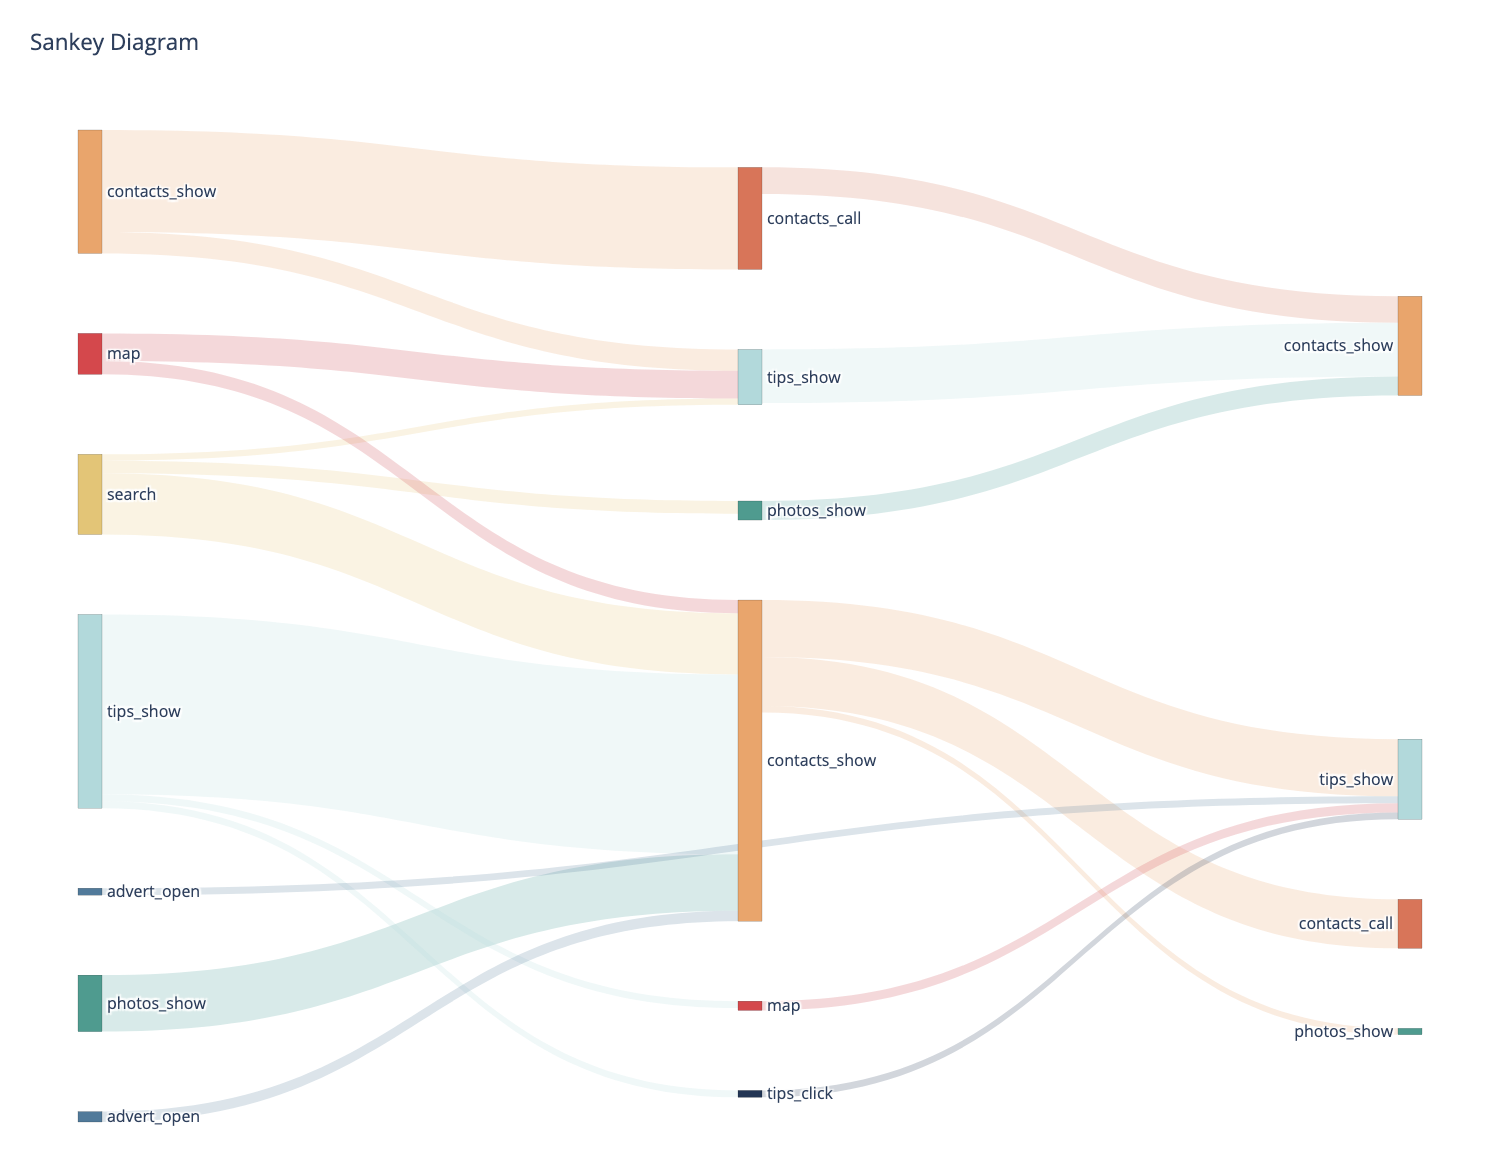

3. At the next stage, we analyzed the identified user behavior scenarios leading to the target action and **built conversion funnels for the selected scenarios broken down by unique users**.  
In total, 4 scenarios were considered:

```
Scenario 1 - `tips_show -> contacts_show` conversion rate 18%  
Scenario 2 - `contacts_show -> contacts_call` conversion rate 22%  
Scenario 3 - `photos_show -> contacts_show` conversion rate 31%  
Scenario 4 - `search -> contacts_show` conversion rate 23%
```

- Among users who view recommended ads, 18% have at least once viewed the seller's contact information.  
- Among users who viewed contacts, 22% made a call via the app.  
- Conversion results to the target action are better in this scenario compared to others among users who viewed photos; nearly a third of users who viewed photos also viewed the seller's contact information.  
- Of those users who used the search, 23% have at least once viewed contacts.

4. Also, within the first research question, we **calculated session durations with and without contact viewing** and determined that **the difference between the averages is statistically significant** at `alpha=0.05`:
- Average session duration with contact viewing = 8.5 minutes (median = 5.2 minutes)
- Average session duration without contact viewing = 6.6 minutes (median = 4.5 minutes)
- The average difference is 2 minutes.

#### **2. Calculation of the relative frequency (proportion) of events in the context of two groups of users**

- 1 group of users who viewed contacts
- 2 group of users who did NOT view contacts

Let's calculate the relative frequency of events for users who at least once viewed the seller's contacts.
We use the original table without performing the duplicate removal procedure

In [99]:
users_cs_true = mobile_df[mobile_df['user_id'].isin(mobile_df.query('event_name == "contacts_show"')\
                                                          .user_id.unique())]
users_cs_true.head()

,event_time,event_name,user_id,source,session_id
31632,2019-10-19 21:34:33.849769,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5
31636,2019-10-19 21:35:19.296599,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5
31640,2019-10-19 21:36:44.344691,search,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5
31655,2019-10-19 21:40:38.990477,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5
31659,2019-10-19 21:42:13.837523,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,yandex,5


In [100]:
users_cs_true_pivot = users_cs_true.groupby('event_name').agg({'user_id':'count'})\
                                    .sort_values(by='user_id',ascending=False).reset_index()
users_cs_true_pivot.columns = ['event_name', 'event_counts']
users_cs_true_pivot['event_counts_share_t'] = round(users_cs_true_pivot['event_counts']/sum(users_cs_true_pivot['event_counts']),2)
users_cs_true_pivot

,event_name,event_counts,event_counts_share_t
0,tips_show,12768,0.47
1,contacts_show,4529,0.17
2,photos_show,3828,0.14
3,search,2084,0.08
4,advert_open,1589,0.06
5,map,1101,0.04
6,contacts_call,541,0.02
7,favorites_add,424,0.02
8,tips_click,333,0.01


Now let's calculate the relative frequency of events for users who have never viewed sellers' contacts in the app.

In [101]:
users_cs_false = mobile_df[~mobile_df['user_id'].isin(users_cs_true.user_id.unique())]
users_cs_false_pivot = users_cs_false.groupby('event_name').agg({'user_id':'count'})\
                                    .sort_values(by='user_id',ascending=False).reset_index()
users_cs_false_pivot.columns = ['event_name', 'event_counts']
users_cs_false_pivot['event_counts_share_f'] = round(users_cs_false_pivot['event_counts']/sum(users_cs_false_pivot['event_counts']),2)
users_cs_false_pivot

,event_name,event_counts,event_counts_share_f
0,tips_show,27287,0.58
1,photos_show,6184,0.13
2,search,4700,0.10
3,advert_open,4575,0.10
4,map,2780,0.06
5,favorites_add,993,0.02
6,tips_click,481,0.01


In [102]:
plot_data = pd.merge(users_cs_true_pivot, users_cs_false_pivot, on='event_name', how='outer')\
        [['event_name','event_counts_share_t','event_counts_share_f']]
plot_data

,event_name,event_counts_share_t,event_counts_share_f
0,advert_open,0.06,0.10
1,contacts_call,0.02,NaN
2,contacts_show,0.17,NaN
3,favorites_add,0.02,0.02
4,map,0.04,0.06
5,photos_show,0.14,0.13
6,search,0.08,0.10
7,tips_click,0.01,0.01
8,tips_show,0.47,0.58


In [104]:
plot_data = pd.merge(users_cs_true_pivot, users_cs_false_pivot, on='event_name', how='outer')\
        [['event_name','event_counts_share_t','event_counts_share_f']]

event_name = plot_data.event_name

fig = go.Figure(data=[
    go.Bar(name='viewed contacts', x=event_name, y=plot_data.event_counts_share_t),
    go.Bar(name='did NOT viewed contacts', x=event_name, y=plot_data.event_counts_share_f)
    ])
fig.update_layout(barmode='group')
#fig.update_layout(title_text='Относительная частота (доля) событий в разрезе двух групп пользователей')
fig.update_layout(
    title_text='Relative frequency of events for two groups of users',
    xaxis_title_text='Events',
    yaxis_title_text='Occuring frequency',
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()

**Conclusions on the second main research question**  
"Calculation of relative frequency (proportion) of events across two user groups":  
```
Group 1: Users who viewed contacts  
Group 2: Users who did NOT view contacts  
```
- Based on the calculations, it can be seen that in Group 1, where users viewed contacts, they less frequently saw recommended ads (by 11%), performed searches slightly less often (by 2%), opened ad cards less frequently (by 4%), opened the map less often (by 2%), and watched photos slightly more often (by 1%).
- At the same time, they added ads to their favorites and clicked on recommended ads at the same frequency (2% and 1%, respectively).
- Among all events, both user groups most frequently saw recommendations (47% and 58%), followed by watching photos (14% and 13%).
- It is logical that in Group 2, there are no events with calls to the seller from the app.

#### **3. Hypothesis testing**

##### 3.1 Hypothesis Testing 1

Some users perform the actions `tips_show` and `tips_click`, while others only perform `tips_show`.  
Let's test Hypothesis 1:  
- H_0: The conversion rate to viewing contacts is the same for both groups  
- H_a: The conversion rate to viewing contacts differs between the groups  

In [105]:
# Select users who performed the action tips_show (and any other action)
ts_u = dur_ses_data.query('event_name=="tips_show"').user_id.unique()
print("Total users who performed 'tips_show': %s" % (len(ts_u)))

# Select users who performed the action tips_click (and any other action)
tc_u = dur_ses_data.query('event_name=="tips_click"').user_id.unique()
print("Total users who performed 'tips_click': %s" % (len(tc_u)))

# Find the intersection of sets and users who performed both tips_show and tips_click
ts_tc_u = list(set(ts_u).intersection(set(tc_u)))
print("Users who performed both 'tips_show' and 'tips_click': %s" % (len(ts_tc_u)))

# Select users who performed tips_show but did not perform tips_click
ts_only_u = list(set(ts_u).difference(set(ts_tc_u)))
print("Users who performed 'tips_show' but did not perform 'tips_click': %s" % (len(ts_only_u)))

print('-------')
print("Check calculation: users who performed both 'tips_show' and 'tips_click' + users who performed only 'tips_show': %s"
      % (len(ts_only_u) + len(ts_tc_u)))


Total users who performed 'tips_show': 2801
Total users who performed 'tips_click': 322
Users who performed both 'tips_show' and 'tips_click': 297
Users who performed 'tips_show' but did not perform 'tips_click': 2504
-------
Check calculation: users who performed both 'tips_show' and 'tips_click' + users who performed only 'tips_show': 2801


Let's find how many users from 2 groups performed the target action - viewed contacts

In [106]:
# Select users who performed the action contacts_show (and any other action)
csh_u = dur_ses_data.query('event_name=="contacts_show"').user_id.unique()
print("Total users who performed 'contacts_show': %s" % (len(csh_u)))

# Find the intersection of sets and users who performed both tips_show, tips_click, and viewed contacts
ts_tc_csh_u = list(set(ts_tc_u).intersection(set(csh_u)))
print("Users who performed both 'tips_show', 'tips_click' and 'contacts_show': %s" % (len(ts_tc_csh_u)))

# Find the intersection of sets and users who performed tips_show, did not perform tips_click, and viewed contacts
ts_only_csh_u = list(set(ts_only_u).intersection(set(csh_u)))
print("Users who performed 'tips_show', did not perform 'tips_click' and 'contacts_show': %s" % (len(ts_only_csh_u)))


Total users who performed 'contacts_show': 981
Users who performed both 'tips_show', 'tips_click' and 'contacts_show': 91
Users who performed 'tips_show', did not perform 'tips_click' and 'contacts_show': 425


To check the hypothesis:

- H₀: Conversion to contact views is the same for both groups.
- Hₐ: Conversion to contact views differs between the groups.

Given alpha = 0.05, we will calculate the conversion rates for both groups and perform a statistical test to determine whether we can reject the null hypothesis.

In [107]:
alpha = 0.05  # Critical significance level

# Successes for each group: users who performed the target event 'contacts_show'
successes = np.array([len(ts_only_csh_u),
                      len(ts_tc_csh_u)])  # tips_show_only, tips_show_tips_click

# Trials: total number of users who performed the respective actions
trials = np.array([len(ts_only_u),
                   len(ts_tc_u)])  # tips_show_only, tips_show_tips_click

print(successes, trials)

# Conversion rates for each group
p1 = successes[0] / trials[0]
p2 = successes[1] / trials[1]
print('Conversion for tips_show_only group = %s' % (round(p1, 2)))
print('Conversion for tips_show & tips_click group = %s' % (round(p2, 2)))
print('------')

# Combined probability
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# Difference between conversion rates
difference = p1 - p2

# Z-score calculation
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

# Normal distribution for p-value calculation
distr = st.norm(0, 1)

# Two-tailed p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

# Hypothesis test result
if p_value < alpha:
    print('Reject the null hypothesis: difference is statistically significant')
else:
    print('Fail to reject the null hypothesis: no significant difference in conversion rates')


[425  91] [2504  297]
Conversion for tips_show_only group = 0.17
Conversion for tips_show & tips_click group = 0.31
------
p-value:  9.218316554537864e-09
Reject the null hypothesis: difference is statistically significant


**Conclusion based on the results of hypothesis test 1:**  
```
H_0: The conversion rate to contact views is the same for both groups  
H_a: The conversion rate to contact views is different between the groups  
alpha = 0.05
```
The conversion rate to contact views for the two user groups (one group performs both tips_show and tips_click actions, the other only performs tips_show) is different.  
For the first group, the conversion rate is 31%, and for the second group, it is 17%.  
The statistical test showed that the differences in conversion rates are statistically significant. This means that users who open recommended ads are more likely to view the seller's contact information.

##### **3.2 Hypothesis Test 2**  

- I assume the typical behavior of users is as follows: users first browse ads in a category, then add some to favorites, and afterward begin making calls based on the ads. Therefore, there are two groups of users: those who view contacts after adding to favorites, and those who view contacts without adding to favorites.  

Test hypothesis 2:  
H_0: The conversion rate to contact views is the same for both groups  
H_a: The conversion rate to contact views is different between the groups

In [108]:
# Select users who performed the 'favorites_add' action (and any other action)
favadd_u = dur_ses_data.query('event_name=="favorites_add"').user_id.unique()
print("Total users who performed the 'favorites_add' action: %s"
    % (len(favadd_u)))

# Select users who did NOT perform the 'favorites_add' action
no_favadd_u = list(set(dur_ses_data.user_id.unique())\
    .intersection(set(dur_ses_data[~dur_ses_data['user_id'].isin(favadd_u)].user_id.unique())))
print("Total users who did NOT perform the 'favorites_add' action: %s"
    % (len(no_favadd_u)))

print('-------')


Total users who performed the 'favorites_add' action: 351
Total users who did NOT perform the 'favorites_add' action: 3942
-------


In [109]:
# Find how many users from the two groups performed the target action - viewed contacts
# Select users who performed the 'contacts_show' action (and any other action)
csh_u = dur_ses_data.query('event_name=="contacts_show"').user_id.unique()
print("Total users who performed the 'contacts_show' action: %s"
    % (len(csh_u)))

# Find the intersection of sets of users who performed both 'favorites_add' and viewed contacts
favadd_csh_u = list(set(favadd_u).intersection(set(csh_u)))
print("Users who performed both 'favorites_add' and 'contacts_show': %s"
    % (len(favadd_csh_u)))

# Find the intersection of sets of users who did not perform 'favorites_add' but viewed contacts
no_favadd_csh_u = list(set(ts_only_u).intersection(set(csh_u)))
print("Users who did not perform 'favorites_add' but viewed contacts 'contacts_show': %s"
    % (len(no_favadd_csh_u)))

Total users who performed the 'contacts_show' action: 981
Users who performed both 'favorites_add' and 'contacts_show': 136
Users who did not perform 'favorites_add' but viewed contacts 'contacts_show': 425


**Let's perform the hypothesis test:**

```
H_0: The conversion rate to contact views is the same for both groups  
H_a: The conversion rate to contact views differs between the groups  
alpha = 0.05
```

In [110]:
alpha = 0.05  # critical significance level

successes = np.array([len(favadd_csh_u),
                      len(no_favadd_csh_u)])  # favorites_add, NO favorites_add
trials = np.array([len(favadd_u),
                   len(no_favadd_u)])  # favorites_add, NO favorites_add

print(successes, trials)  # REVIEWER'S CODE

# your code
p1 = successes[0] / trials[0]
p2 = successes[1] / trials[1]
print('Conversion rate for users with favorites_add = %s' % (round(p1, 2)))
print('Conversion rate for users without favorites_add = %s' % (round(p2, 2)))
print('------')

p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

# your code
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if p_value < alpha:
    print('Reject the null hypothesis: the difference is statistically significant')
else:
    print('Failed to reject the null hypothesis: no difference in conversion rates')


[136 425] [ 351 3942]
Conversion rate for users with favorites_add = 0.39
Conversion rate for users without favorites_add = 0.11
------
p-value:  0.0
Reject the null hypothesis: the difference is statistically significant


**Results of Hypothesis 2 Testing:**  
```
H_0: The conversion rate to contact views is the same for both groups   
H_a: The conversion rate to contact views differs between the groups  
alpha = 0.05
```
The conversion rate to contact views for two groups of users (those who added items to favorites and those who did not) is different:
- The conversion rate to contact views for users who added items to favorites is 39%
- The conversion rate to contact views for users who did not add items to favorites is 11%

The statistical test showed that the difference is statistically significant.  
Thus, we can conclude that users who add items to their favorites are more likely to view the seller's contact information.

##### **3.3 General Conclusion Based on Hypothesis Testing Results**


- The conversion rate to contact views differs between two groups of users (those who perform both `tips_show` and `tips_click` actions, and those who only perform `tips_show`).  
  For the first group, the conversion rate is 31%, and for the second group, it is 17%.   
  The statistical test showed that the difference in conversion rates is statistically significant. This means that users who open recommended ads are more likely to view the seller's contact information.

- The conversion rate to contact views also differs between two groups of users (those who added items to favorites and those who did not) — 39% vs. 11%, respectively. The statistical test showed that the difference is statistically significant. Therefore, we can conclude that users who add items to their favorites are more likely to reach the stage of viewing the seller's contact information.